<h2>Machine learning and data analysis applied in finance</h2>
We demonstrate the power of using machine learning algorithms, mathematical models, and computational techniques in understanding financial markets, providing data-driven solutions for strategy development and business growth.

In [1]:
# IMPORTING LIBRARIES

# Libraries for data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Libraries for optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Libraries for financial data
import quantstats as qs
import ta
import yfinance as yf

# Libraries for machine learning models
from sklearn.linear_model import LinearRegression

# Libraries for data and time and disabling warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Using statistical analysis in evaluation stock performance
This analysis leverages various statistical techniques to evaluate stock performance, including daily and cumulative returns, histograms, kurtosis, skewness, standard deviation, pairplots, correlation matrices, and calculations of beta, alpha, and Sharpe Ratio. These metrics provide a comprehensive understanding of stock volatility, returns, and risk-adjusted performance, offering valuable insights into investment decisions.

<b>Investigating Daily Returns</b>
We look at different US stocks over the same period of time and compare their performance based on the trend of their daily returns.

In [2]:
# Getting daily returns within the same time period
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2020-01-01':'2024-07-01']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2020-01-01':'2024-07-01']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2020-01-01':'2024-07-01']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2020-01-01':'2024-07-01']

nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc['2020-01-01':'2024-07-01']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Convert timezone of the dataset
aapl.index = aapl.index.tz_localize(None)
tsla.index = tsla.index.tz_localize(None)
dis.index = dis.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)
nvda.index = nvda.index.tz_localize(None)


Daily Returns for Apple:



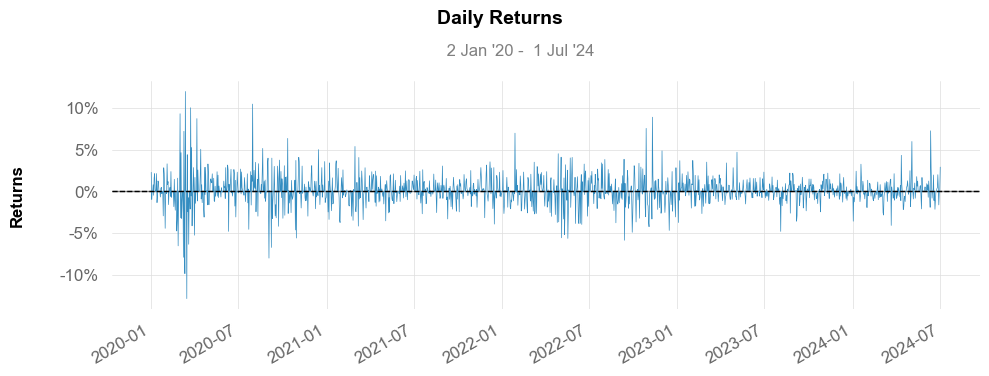


Daily Returns for Tesla:



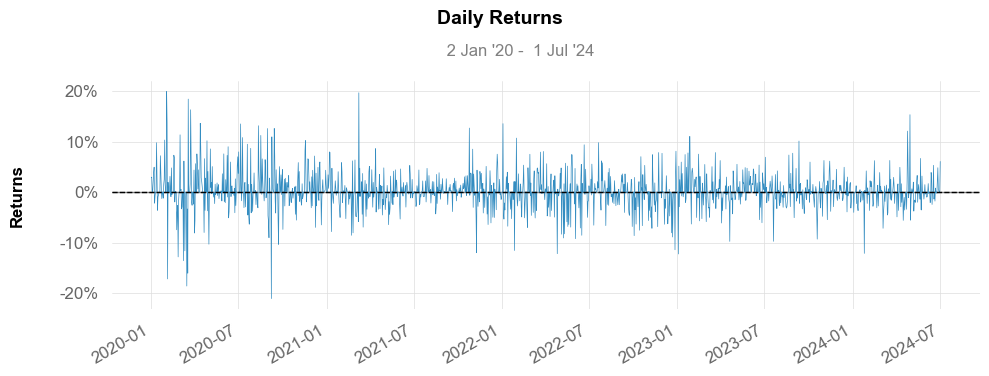


Daily Returns for The Walt Disney:



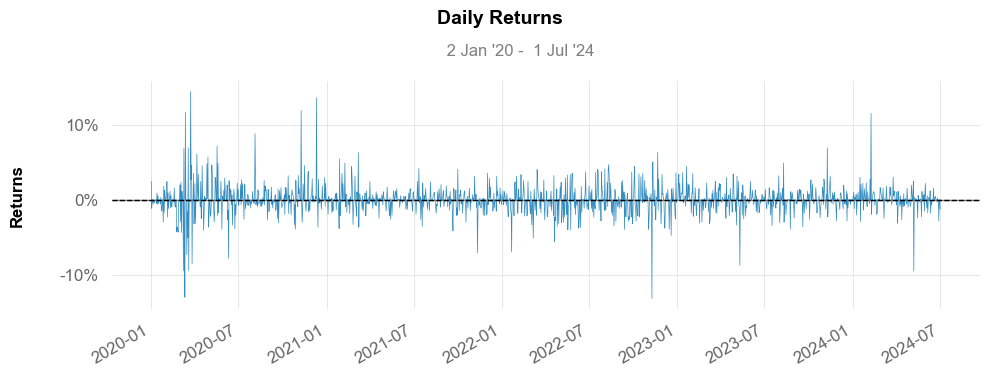


Daily Returns for AMD:



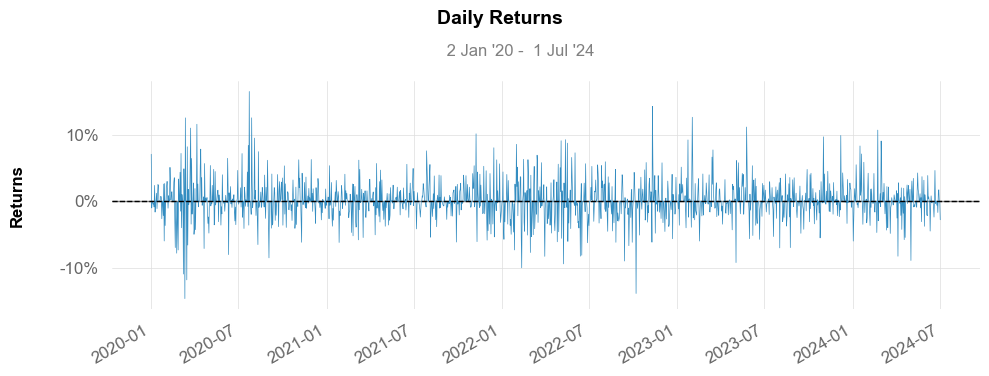


Daily Returns for NVDIA:



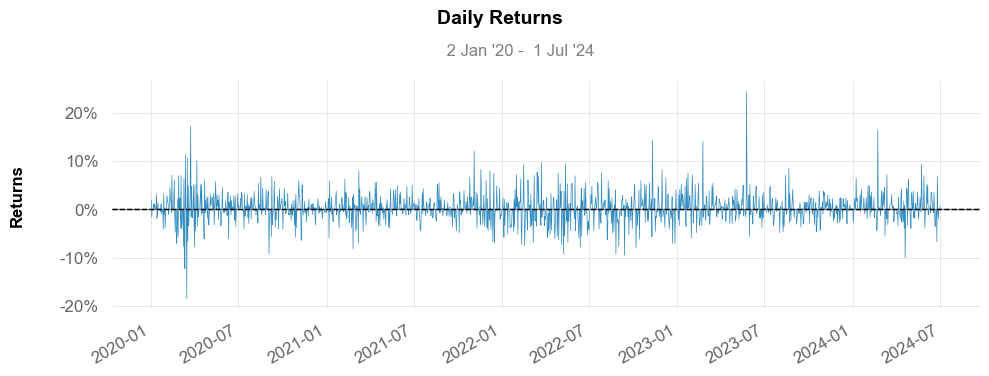

In [4]:
# Plotting Daily Returns for each US stock

print("\nDaily Returns for Apple:\n")
qs.plots.daily_returns(aapl,benchmark=None)

print("\nDaily Returns for Tesla:\n")
qs.plots.daily_returns(tsla,benchmark=None)

print("\nDaily Returns for The Walt Disney:\n")
qs.plots.daily_returns(dis,benchmark=None)

print("\nDaily Returns for AMD:\n")
qs.plots.daily_returns(amd,benchmark=None)

print("\nDaily Returns for NVDIA:\n")
qs.plots.daily_returns(nvda,benchmark=None)

The plots of the daily returns for each stock demonstrate stability at a glance, with variations ranging from -10% to 10% within the considered time period (January 2020 to July 2024). Tesla's and NVIDIA's stocks demonstrated unusual increase reaching up to 20% in the year 2020 and 2021 for Tesla and 2023 for NVIDIA. Occurrences of steep variations may indicate high volatility which can be associated as a riskier investment option.

<b>Cumulative Returns</b> measure the cumulative gain(loss) of an investment for a specified period of time. It is calculated using the difference of the final stock price and the initial stock price, by which the dividends and other income received are added, and the resulting value is divided by the initial stock price. The cumulative return also takes into account the effect of compounding as any gains(losses) are reinvested, which contributes to the additional returns in the future periods.


Cumulative Returns for Apple:



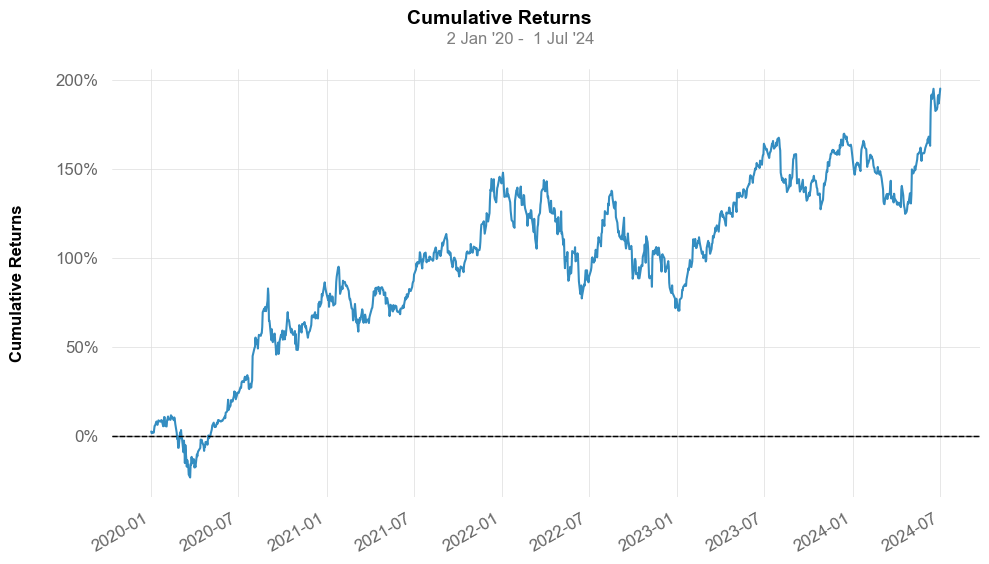


Cumulative Returns for Tesla:



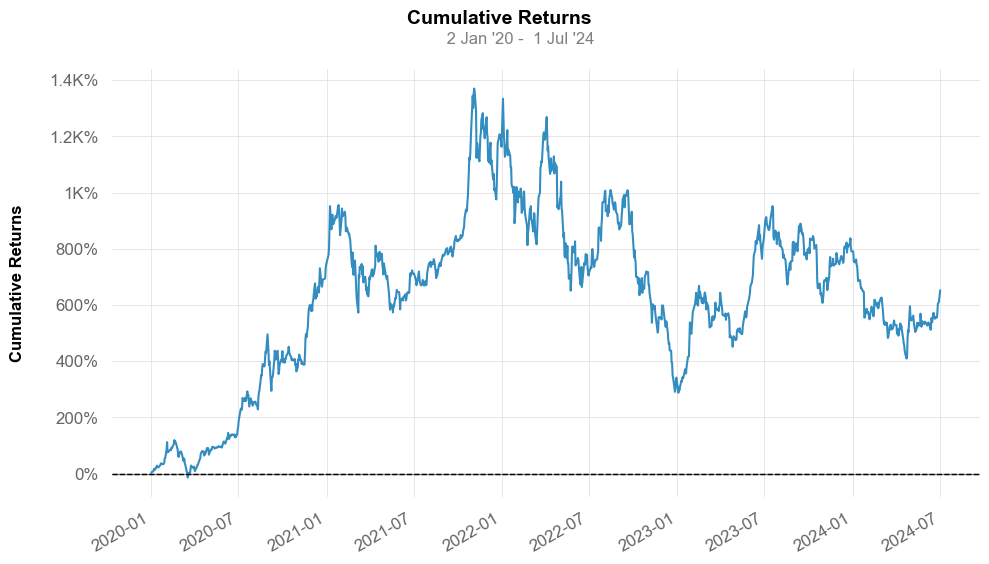


Cumulative Returns for The Walt Disney:



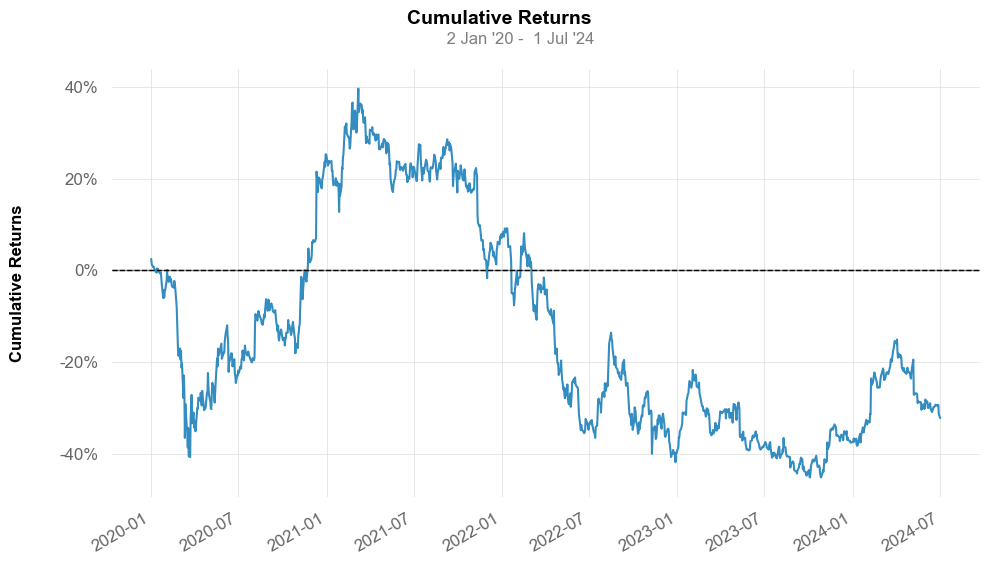


Cumulative Returns for AMD:



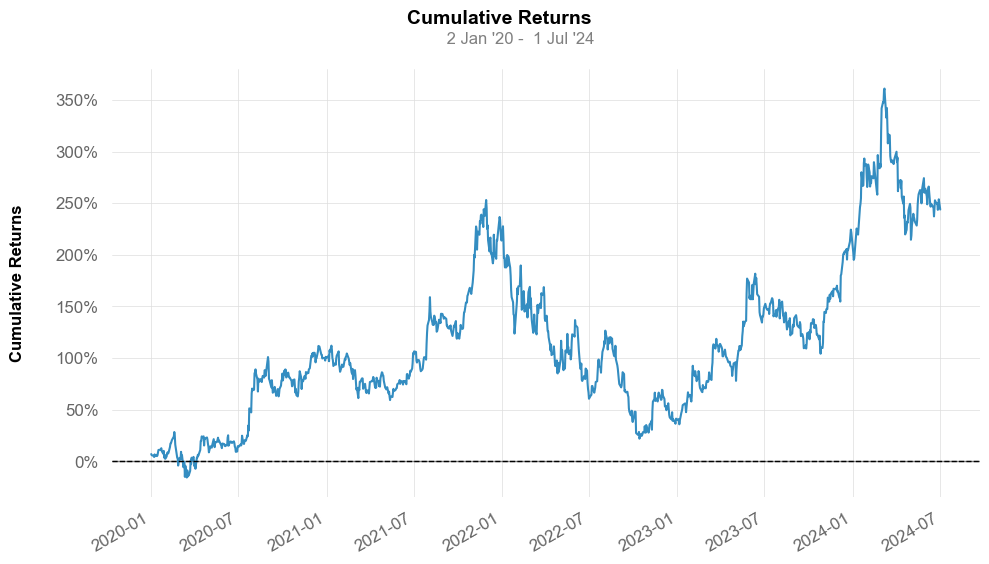


Cumulative Returns for NVDIA:



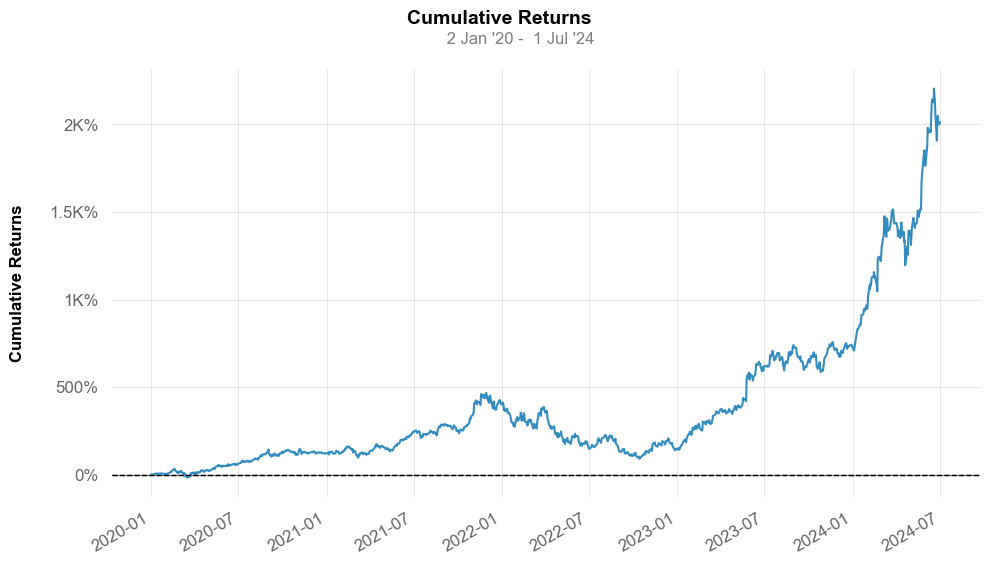

In [5]:
# Plotting Cumulative Returns for each US stock

print("\nCumulative Returns for Apple:\n")
qs.plots.returns(aapl,benchmark=None)

print("\nCumulative Returns for Tesla:\n")
qs.plots.returns(tsla,benchmark=None)

print("\nCumulative Returns for The Walt Disney:\n")
qs.plots.returns(dis,benchmark=None)

print("\nCumulative Returns for AMD:\n")
qs.plots.returns(amd,benchmark=None)

print("\nCumulative Returns for NVDIA:\n")
qs.plots.returns(nvda,benchmark=None)

The cumulative return plots show Tesla and NVIDIA reaching 1,200% and 2,000% increase, respectively, over the considered time period. This shows a high return for investors who bought stocks during 2020. Moderate performances on Apple and AMD stocks were observed. In contrast among others, The Walt Disney stocks performed lowly with returns ranging only around 40%. 

#### Use of stastical analysis in understanding stock trends based on their distribution measures
Using histograms to show the graphical representation of the frequency of certain parameters. The histogram of daily returns help identify patterns that indicate the level of stability and volatity of stock prices over a period of time.


Histogram of Daily Returns for Apple:



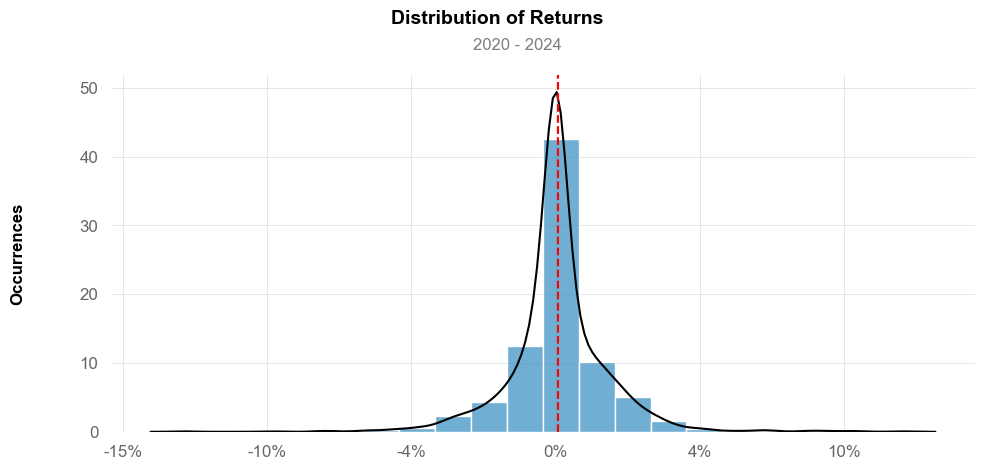


Histogram of Daily Returns for Tesla:



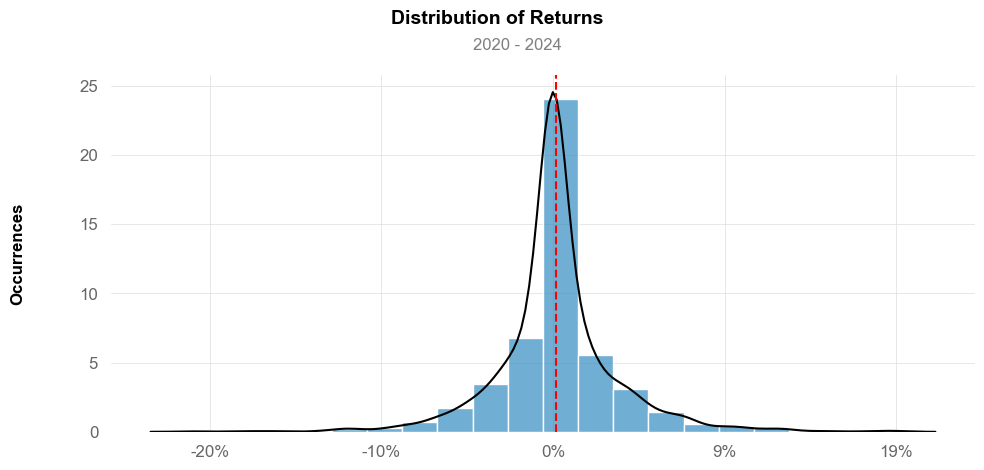


Histogram of Daily Returns for The Walt Disney:



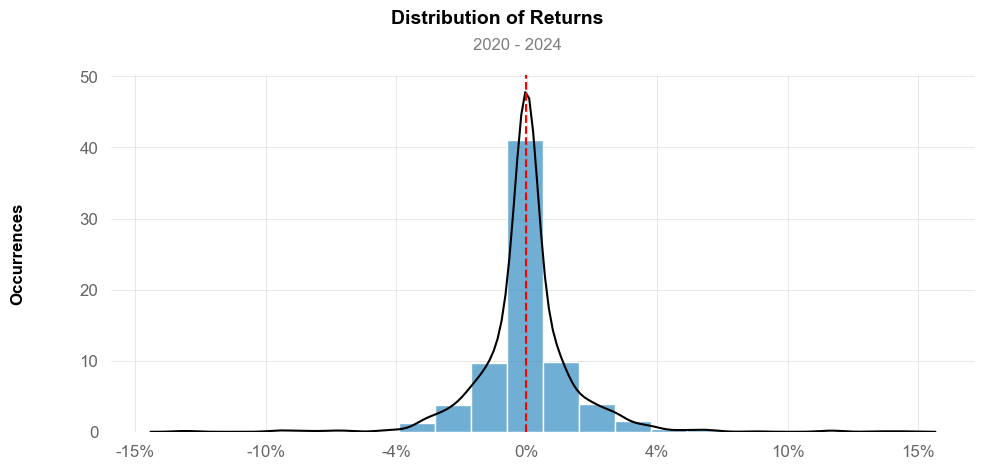


Histogram of Daily Returns for AMD:



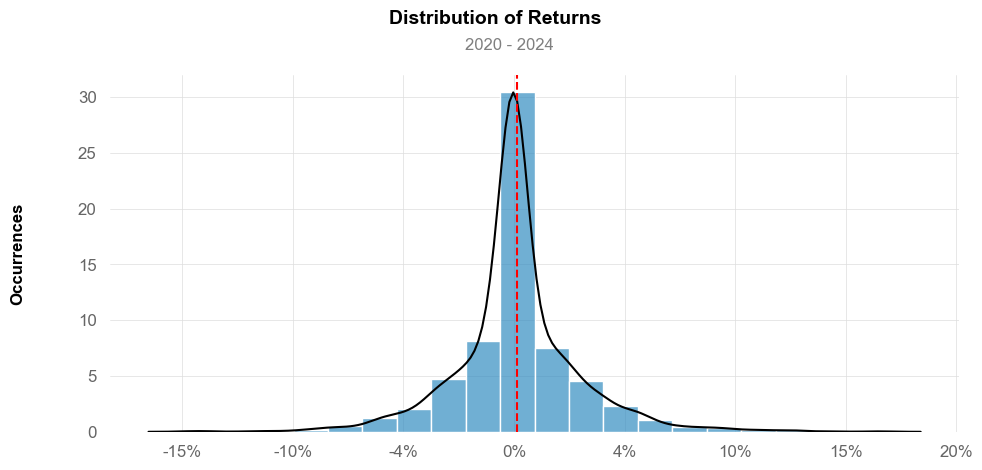


Histogram of Daily Returns for NVDIA:



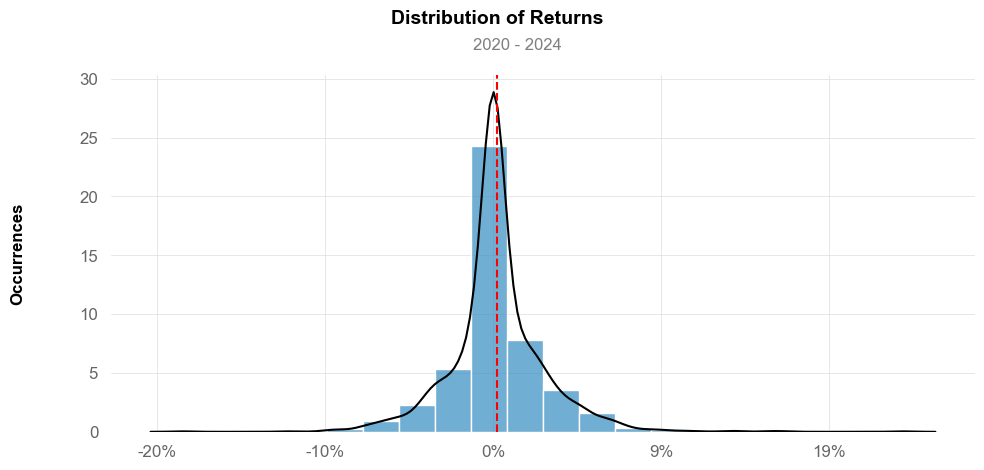

In [6]:
# Plotting histograms of Daily Returns for each US stock

print("\nHistogram of Daily Returns for Apple:\n")
qs.plots.histogram(aapl, resample = 'D')

print("\nHistogram of Daily Returns for Tesla:\n")
qs.plots.histogram(tsla, resample = 'D')

print("\nHistogram of Daily Returns for The Walt Disney:\n")
qs.plots.histogram(dis, resample = 'D')

print("\nHistogram of Daily Returns for AMD:\n")
qs.plots.histogram(amd, resample = 'D')

print("\nHistogram of Daily Returns for NVDIA:\n")
qs.plots.histogram(nvda, resample = 'D')

The histograms show that most daily returns for each stocks considered are close to zero, the center of the distribution, with the spread reading to (plus minus) 15% - 20%. We can see that there are no presence of outliers and that all have fairly balanced returns. Other statistical measures such as the <b>kurtosis</b>, <b>skewness</b>, and <b>standard deviation</b> can be derived from the histogram. 

The <b>kurtosis</b> describes the distribution of the data points, particulary the tails and the peak of the distribution. This measure can be categorized into the following: 
<ul>
    <li>Leptokurtic: Values above 3.0 which indicates sharp peak and heavy tails.</li>
    <li>Mesokurtic: Values equal to 3.0 which is similar to a normal distribution.</li>
    <li>Platykurtic: Values less than 3.0 which indicates flatter peak and light tails.</li> 
</ul>
In finance, a leptokurtic distribution indicates that an investment option has a higher chance of extreme returns, thus classified as a risky investment with potentially higher reward or loss. A mesokurtic distribution corresponds to a moderate level of extreme returns. Lastly, a platykurtic distribution indicates a stable option of investment as it has lower chance of extreme returns.

In [7]:
# Using quantstats to measure kurtosis
print("\nApple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))
print("\nTesla's kurtosis: ", qs.stats.kurtosis(tsla).round(2))
print("\nWalt Disney's kurtosis: ", qs.stats.kurtosis(dis).round(2))
print("\nAdvances Micro Devices' kurtosis: ", qs.stats.kurtosis(amd).round(2))
print("\nNVIDIA' kurtosis: ", qs.stats.kurtosis(nvda).round(2))


Apple's kurtosis:  5.02

Tesla's kurtosis:  3.01

Walt Disney's kurtosis:  7.99

Advances Micro Devices' kurtosis:  2.13

NVIDIA' kurtosis:  4.28


The stocks Walt Disney, Apple, and NVIDIA (in order from highest to lowest) are identified with a leptokurtic distribution, suggesting that these stocks demonstrates high levels of volatility and risk. While Tesla shows a normal distribion which suggests that it's a moderate investment option. Lastly, AMD shows a platykurtic distribution  suggesting its low chance of extreme returns.

The <b>skewness</b> describes the asymmetry of the distribution of the data points, it indicates the direction and skew or deviation from a normal distribution. The two categories are the following:
<ul>
    <li>Positive skew (right skew): The tail on the right side of the distribution is longer. Most values are concentrated on the left with a few large values on the right</li>
    <li>Negative skew (left skew): The tail on the left side of the distribution is longer. Most values are concentrated on the right with a few large values on the left</li>
</ul>
In finance, a positive skew indicates that most returns are concentrated on the lower end with ocassional high returns. While a negative skew indicates that most returns are concentrated on the higher end with ocassional low returns.

In [8]:
# Using quantstats to measure skewness
print("\nApple's skewness: ", qs.stats.skew(aapl).round(2))
print("\nTesla's skewness: ", qs.stats.skew(tsla).round(2))
print("\nWalt Disney's skewness: ", qs.stats.skew(dis).round(2))
print("\nAdvances Micro Devices' skewness: ", qs.stats.skew(amd).round(2))
print("\nNVIDIA' skewness: ", qs.stats.skew(nvda).round(2))


Apple's skewness:  0.13

Tesla's skewness:  0.13

Walt Disney's skewness:  0.31

Advances Micro Devices' skewness:  0.22

NVIDIA' skewness:  0.45


The skewness measure for all stocks demonstrates moderate level of skewness as they fall within -0.5 to 0.5. A general observation suggests that the stocks considered have small investment returns with chance of occasional high returns.

The <b>standard deviation</b> measures the dispersion of the data points from the mean. A low standard deviation indicates that values are close to the mean and high standard deviation signifies a wider spread of the values.

In finance, a low standard deviation indicates that returns are close to the average return, which makes it a less risky investment as it's predictable and stable. While a high standard deviation indicates that returns are more volatile as it is spread out, which makes it a risky investment given the chances of extreme returns on gains and losses.

In [9]:
# Calculating the mean and standard deviation
print("Considering the period from Jan 2020 to July 2024: ")
print("\nApple's average return is ", np.round(aapl.mean(),3) ," and standard deviation is ", np.round(aapl.std(),3))
print("\nTesla's average return is ", np.round(tsla.mean(),3) ," and standard deviation is ", np.round(tsla.std(),3))
print("\nDisney's average return is ", np.round(dis.mean(),3) ," and standard deviation is ", np.round(dis.std(),3))
print("\nAMD's average return is ", np.round(amd.mean(),3) ," and standard deviation is ", np.round(amd.std(),3))
print("\nNVIDIA's average return is ", np.round(nvda.mean(),3) ," and standard deviation is ", np.round(nvda.std(),3))

Considering the period from Jan 2020 to July 2024: 

Apple's average return is  0.001  and standard deviation is  0.021

Tesla's average return is  0.003  and standard deviation is  0.042

Disney's average return is  -0.0  and standard deviation is  0.022

AMD's average return is  0.002  and standard deviation is  0.033

NVIDIA's average return is  0.003  and standard deviation is  0.034


The following stocks considered show high standard deviation relative to their average returns signifying volatility.

<b>Correlation analysis</b> evaluates the strength and direction of the linear relationship between two variables. This statistical method can be used in comparing stocks, specifically for diversification and risk management. A positive correlation indicates two stocks moving in the same direction, being influenced by similar factors, while a negative correlation indicates two stocks moving in opposite direction. Insights from correlation analysis are beneficial for devising hedging strategies and pairs trading.

In [10]:
merged_df = pd.concat([aapl, tsla, dis, amd, nvda], join = 'outer', axis =1)
merged_df.columns = ['aapl','tsla','dis','amd','nvda']
merged_df

,aapl,tsla,dis,amd,nvda
Date,,,,,
2020-01-02,0.022816,0.028518,0.024684,0.070650,0.019592
2020-01-03,-0.009722,0.029633,-0.011471,-0.010183,-0.016006
2020-01-06,0.007968,0.019255,-0.005802,-0.004321,0.004194
2020-01-07,-0.004703,0.038801,0.000343,-0.002893,0.012107
2020-01-08,0.016086,0.049205,-0.002059,-0.008705,0.001876
...,...,...,...,...,...
2024-06-25,0.004468,0.026126,0.002157,0.000000,0.067564
2024-06-26,0.019993,0.048145,-0.000196,-0.016911,0.002459
2024-06-27,0.003986,0.005347,-0.000098,0.012251,-0.019066


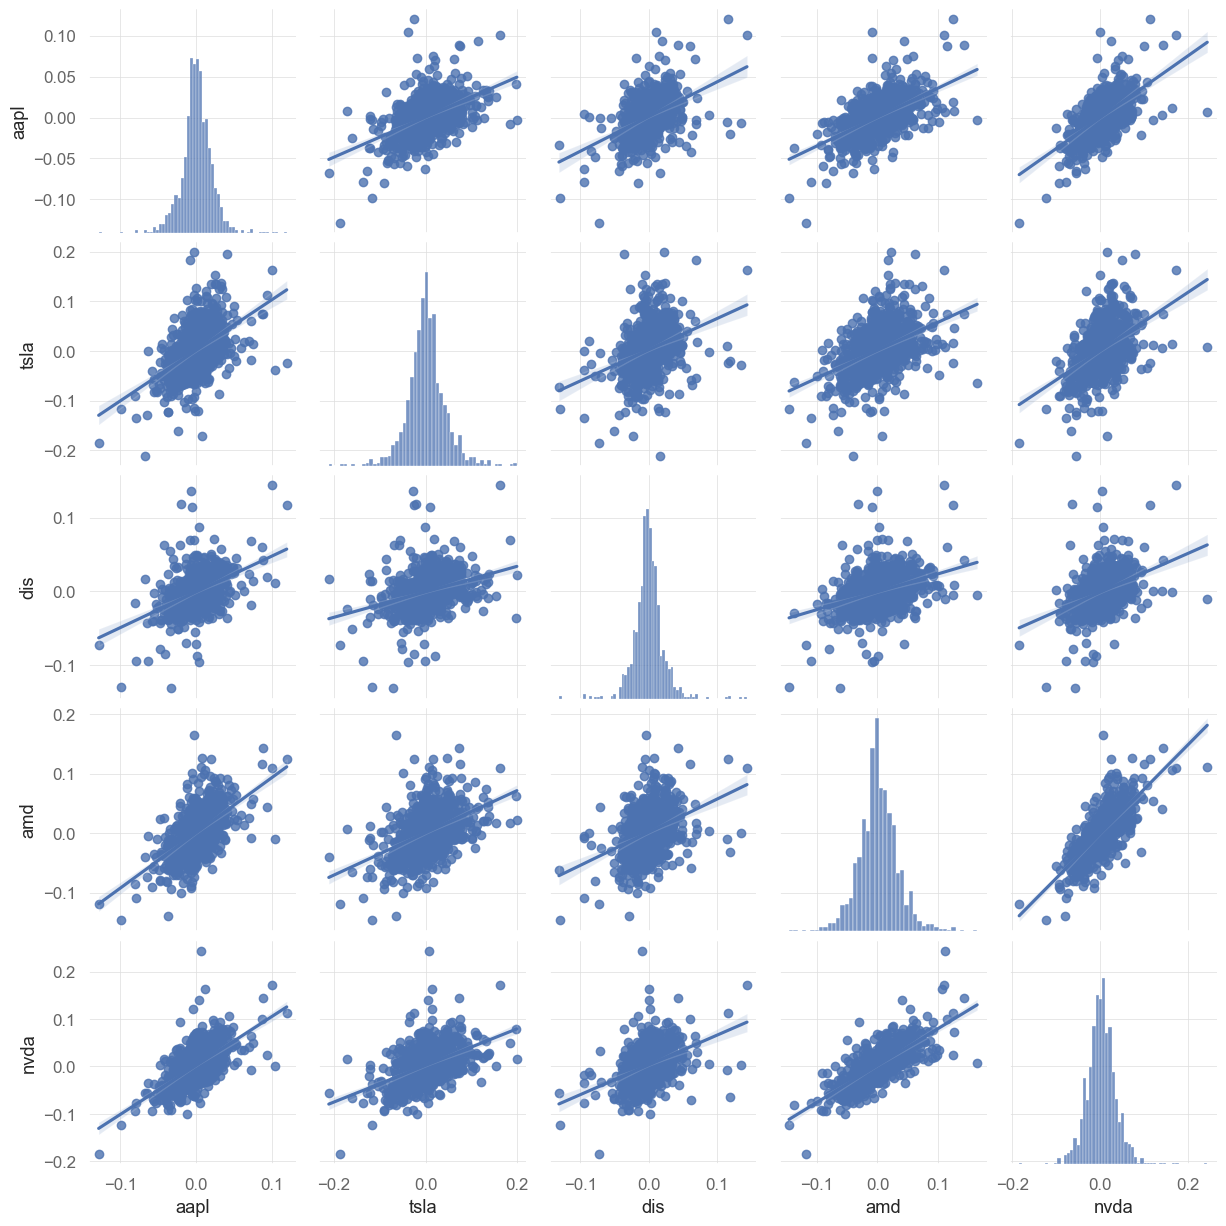

In [11]:
# Generating pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

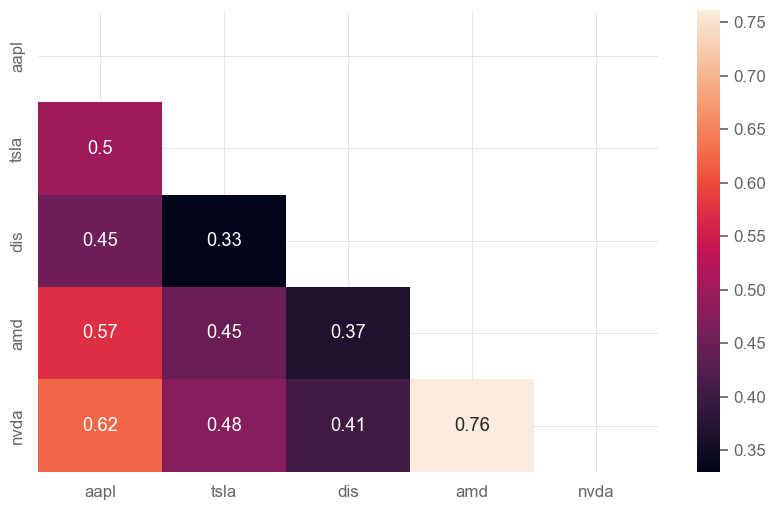

In [12]:
# Calculating correlation matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

The correlation matrix indicates a positive correlation among all the stocks considered: Tesla, Disney, AMD, Nvidia, and Apple. Notably, Nvidia exhibits a stronger correlation with both Apple and AMD. It is important to observe that none of the stocks demonstrate a negative correlation with each other, meaning none of them can effectively act to limit losses through diversification. In hedging strategies, stocks that are inversely correlated are typically selected to minimize the risk of potential losses in the overall portfolio.

The <b>Beta</b> ($\beta$) and <b>Alpha</b> ($\alpha$) are financial metrics that measures the performance of a stock relative to the overall market. 
Beta is a measure of stock's volatility compared to the market, categorized by the following thresholds:
<ul>
    <li>$\beta$ = 1: the stock is as volatile as the market</li>
    <li>$\beta$ > 1: the stock has higher volatility than the market</li>
    <li>$\beta$ < 1: the stock has lower volatility than the market</li>
</ul>
On the other hand, Alpha measures the stock's excess return relative to its expected performance based on its $\beta$, categorized into:
<ul>
    <li>positive $\alpha$: the stock has outperformed its expected performance based on its $\beta$</li>
    <li>negative $\alpha$: the stock has underperformed its expected performance based on its $\beta$</li>
</ul>

We will use SP500 as benchmark, for a linear regression model, in determining the Beta and Alpha of the stocks.

In [13]:
# Getting daily returns of the index within the same time period
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2020-01-01':'2024-07-01']
sp500.index = sp500.index.tz_localize(None)

[*********************100%%**********************]  1 of 1 completed


In [14]:
# Merge the S&P 500 Series with the stocks DataFrame
merged_df.insert(0,'sp500',sp500)
merged_df

,sp500,aapl,tsla,dis,amd,nvda
Date,,,,,,
2020-01-02,0.008379,0.022816,0.028518,0.024684,0.070650,0.019592
2020-01-03,-0.007060,-0.009722,0.029633,-0.011471,-0.010183,-0.016006
2020-01-06,0.003533,0.007968,0.019255,-0.005802,-0.004321,0.004194
2020-01-07,-0.002803,-0.004703,0.038801,0.000343,-0.002893,0.012107
2020-01-08,0.004902,0.016086,0.049205,-0.002059,-0.008705,0.001876
...,...,...,...,...,...,...
2024-06-25,0.003934,0.004468,0.026126,0.002157,0.000000,0.067564
2024-06-26,0.001572,0.019993,0.048145,-0.000196,-0.016911,0.002459
2024-06-27,0.000907,0.003986,0.005347,-0.000098,0.012251,-0.019066


In [15]:
# Initialize a dictionary to store results
results = {}

# List of stock columns
stock_columns = ['aapl', 'tsla', 'dis', 'amd', 'nvda']

# Calculate beta and alpha for each stock using scikit-learn
def calculate_beta_alpha(stock_returns, market_returns):
    # Reshape the returns to fit the model
    market_returns_reshaped = market_returns.values.reshape(-1, 1)
    stock_returns_reshaped = stock_returns.values.reshape(-1, 1)
    
    # Create and fit the linear regression model
    model = LinearRegression().fit(market_returns_reshaped, stock_returns_reshaped)
    
    # Get the beta (slope) and alpha (intercept)
    beta = model.coef_[0][0]
    alpha = model.intercept_[0]
    return beta, alpha

# Calculate beta and alpha for each stock
for stock in stock_columns:
    beta, alpha = calculate_beta_alpha(merged_df[stock], merged_df['sp500'])
    results[stock] = {'Beta': beta, 'Alpha': alpha}

# Display the results
results_df = pd.DataFrame(results).T
results_df

,Beta,Alpha
aapl,1.187146,0.000501
tsla,1.513122,0.001813
dis,1.056193,-0.000695
amd,1.539915,0.000782
nvda,1.718563,0.002307


All stocks exhibit a beta greater than 1, suggesting they are more volatile compared to the S&P 500. Notably, only Disney has a negative alpha, indicating that it has underperformed relative to the expected returns based on its beta and the S&P 500 index.

The <b>Sharpe Ratio</b> measures the risk-adjusted return of an investment or portfolio. It is calculated by dividing the difference of the expected return and the risk-free rate against the standard deviation of the portfolio's excess return. The standard deviation represents the risk of volatility of the portfolio. 

In practice, the risk-free rate is typically based on the return of government bonds. For the analysis, we obtain the data from the yield of a 3-month Tresury bill using `yfinance` as a short-term risk-free rate.


In [16]:
# Fetching the current yield on the 3-month U.S. Treasury bill
t_bill_yield = yf.Ticker("^IRX")  # ^IRX is the symbol for the 3-month Treasury bill yield index
current_yield = t_bill_yield.history(period="1d")['Close'].iloc[-1] / 100  # Converting to a decimal

# Calculate the daily risk-free rate by dividing the annual rate by 252 (trading days in a year)
daily_risk_free_rate = current_yield / 252

print(f"Current 3-month Treasury bill yield: {current_yield}")
print(f"Daily risk-free rate: {daily_risk_free_rate}")

# Calculate the Sharpe Ratio using the daily risk-free rate for each stock
for stock in stock_columns:
    sharpe_ratio = qs.stats.sharpe(merged_df[stock], rf=daily_risk_free_rate, periods=252)  # `periods` argument annualizes the Sharpe Ratio
    results[stock] = {'Sharpe_ratio': sharpe_ratio}

# Display the results
results_df = pd.DataFrame(results).T
results_df

Current 3-month Treasury bill yield: 0.05067999839782715
Daily risk-free rate: 0.00020111110475328235


,Sharpe_ratio
aapl,0.900248
tsla,1.007614
dis,-0.073211
amd,0.782363
nvda,1.526831


The stocks considered exhibit a range of Sharpe Ratios. Tesla and NVIDIA, with Sharpe Ratios greater than 1, particularly NVIDIA with the highest ratio, demonstrate that these stocks provide higher returns for a given level of risk compared to others like Apple and AMD. Notably, Disney has a negative Sharpe Ratio, indicating it underperformed relative to the risk-free asset, the U.S. Treasury bill. 

The Sharpe Ratio offers investors valuable insights into which investments yield adequate returns for the level of risk taken.

### Building and Optimizing Investment Portfolios
This section focuses on constructing and optimizing investment portfolios using advanced optimization models. The goal is to develop a robust portfolio that aligns with specific investment objectives and constraints."

A <b>portfolio</b> is a collection of financial assets, such as stocks, bonds, commodities, and other investments, held by an individual or institution. Investors construct their portfolios to manage risk, enhance returns, and achieve diversification across various asset classes.

The goal of building a portfolio is to create a robust investment strategy that performs well under different economic and market conditions. The allocation of funds across different assets is guided by the investor’s risk tolerance, investment objectives, and time horizon. Portfolios are dynamic and should be periodically reviewed and adjusted to reflect changes in market conditions and ensure alignment with the investor’s risk-return profile.

Portfolio allocation is expressed through weights, which represent the percentage of the total portfolio value assigned to each asset. Determining these weights involves considering factors such as the investor’s risk tolerance, asset performance, growth potential, sector exposure, and diversification benefits. Common techniques for portfolio construction and optimization include Modern Portfolio Theory (MPT) and factor-based investing, which aim to maximize returns while managing risk and aligning with the investor’s overall strategy.

We start by initializing the weight of each stock equally and then determine the optimal weight based on models and algorithms.

In [17]:
n_stock = len(stock_columns)
weights = np.full(n_stock, 1/n_stock)
portfolio = merged_df.iloc[:,1:6].multiply(weights, axis=1).sum(axis=1)
print("Portfolio's Daily Return:\n")
print(portfolio)

Portfolio's Daily Return:

Date
2020-01-02    0.033252
2020-01-03   -0.003550
2020-01-06    0.004259
2020-01-07    0.008731
2020-01-08    0.011281
                ...   
2024-06-25    0.020063
2024-06-26    0.010698
2024-06-27    0.000484
2024-06-28   -0.005712
2024-07-01    0.011069
Length: 1131, dtype: float64


Using Quanstats, we can obtain a detailed analysis of a portfolio's performance compared to a benchmark. We compare the portfolio with S&P 500 index for the time period considered.

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-02   2020-01-02
End Period                 2024-07-01   2024-07-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          69.47%       415.16%
CAGR﹪                     8.43%        28.61%

Sharpe                     0.65         1.16
Prob. Sharpe Ratio         91.14%       99.25%
Smart Sharpe               0.6          1.08
Sortino                    0.9          1.69
Smart Sortino              0.84         1.56
Sortino/√2                 0.64         1.19
Smart Sortino/√2           0.59         1.1
Omega                      1.22         1.22

Max Drawdown               -33.92%      -52.1%
Longest DD Days            745          739
Volatility (ann.)          21.98%       37.57%
R^2                        0.67         0.67
Information Ratio          0.08         0.08
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-12-28,2024-01-12,739,-52.104279,-49.882953
2,2020-02-20,2020-03-18,2020-06-04,106,-38.996424,-37.732007
3,2021-02-12,2021-03-08,2021-06-25,134,-17.125976,-14.510296
4,2020-09-02,2020-09-23,2020-11-23,83,-15.230570,-15.050727
5,2024-03-04,2024-04-19,2024-05-24,82,-14.155944,-13.765092


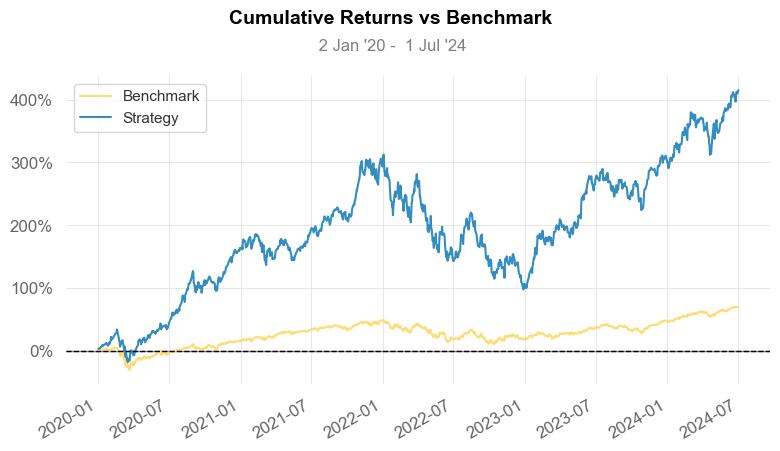

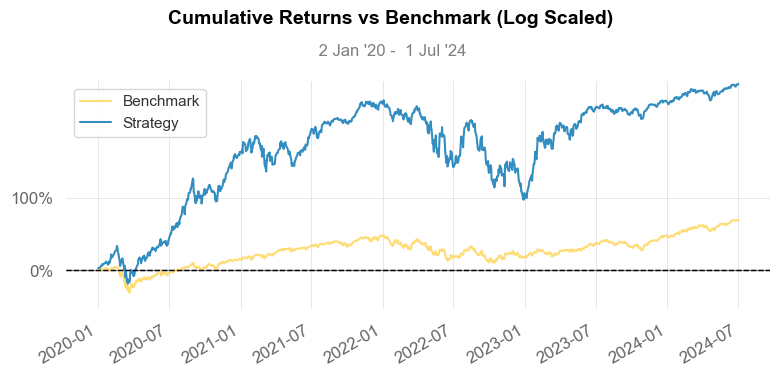

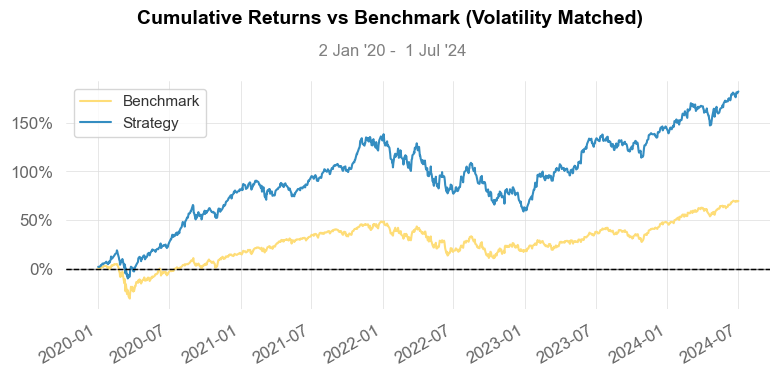

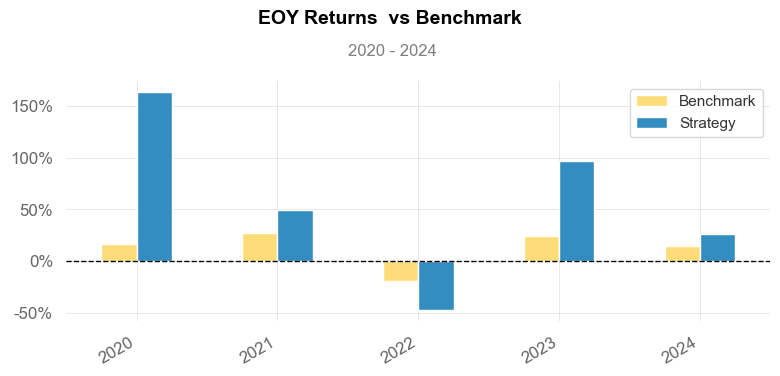

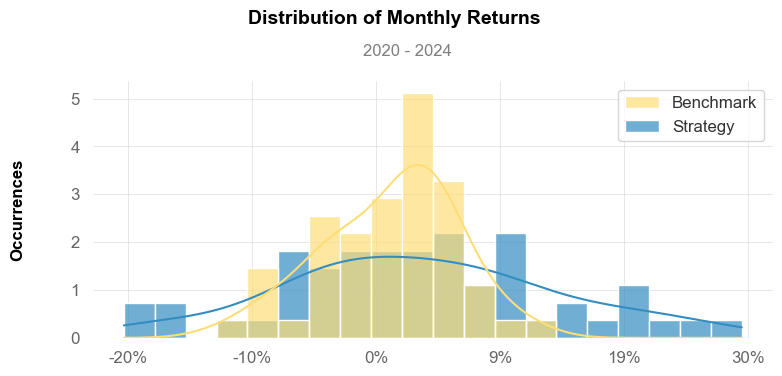

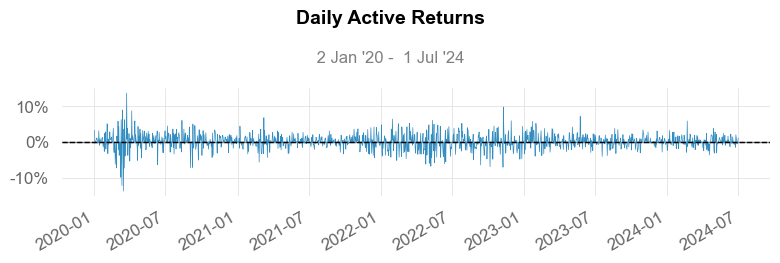

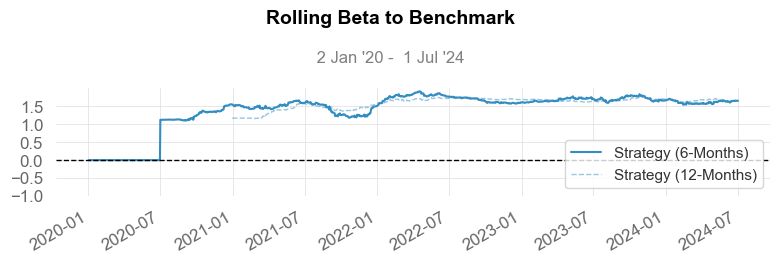

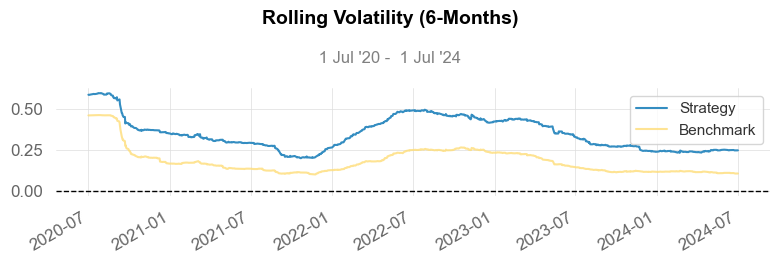

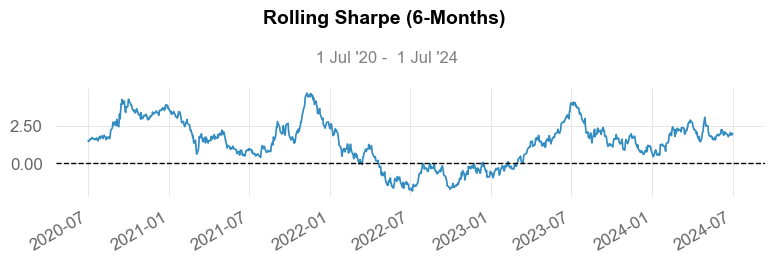

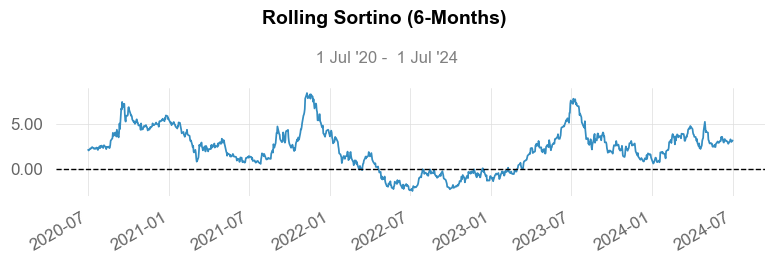

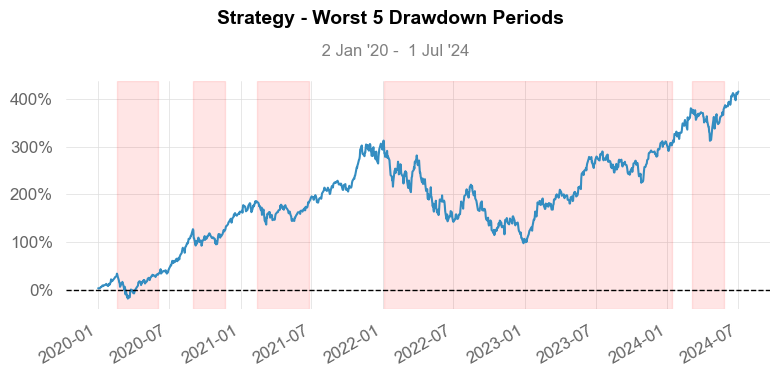

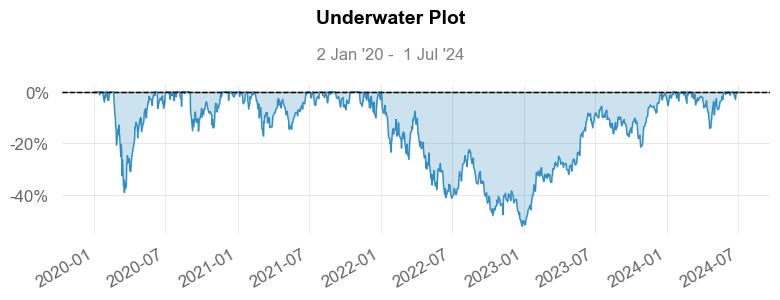

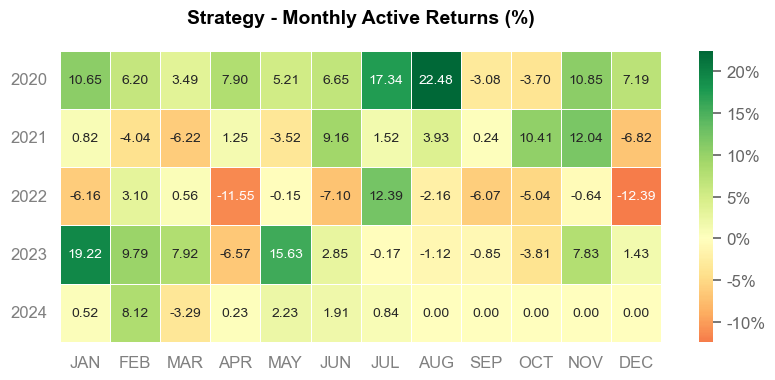

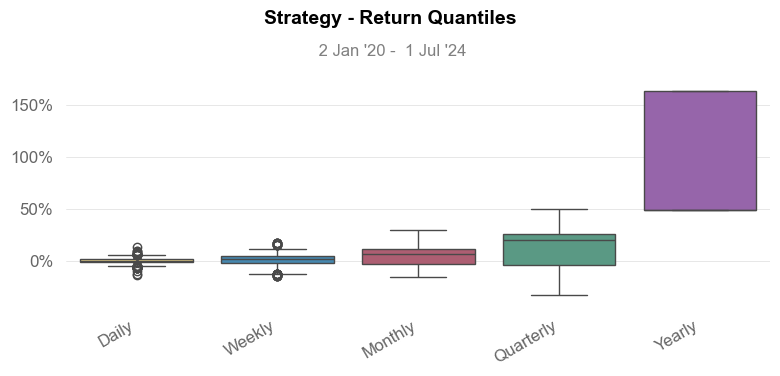

In [18]:
# Generating report on portfolio performance from Jan 1, 2020 to July 1, 2023
qs.reports.full(portfolio, benchmark = sp500)

#### The analysis provides the following:
 - Performance Metrics
      - The portfolio outperformed the benchmark, as evidenced by its significantly higher cumulative return. However, this superior performance comes with increased volatility compared to the index. Despite this volatility, the Sharpe and Sortino ratios indicate that the portfolio achieved high returns during the period under consideration, demonstrating robust risk-adjusted performance.

 - Worst 5 Drawdowns
 - Strategy Visualization of the Portfolio vs Benchmark:
      - Cumulative Returns
      - EOY Returns
      - Distribution of Monthly Returns
      - Daily Active Returns
      - Rolling Beta
      - Rolling Volatility
      - Rolling Sharpe (6-months)
      - Rolling Sortino (6-months)
      - Worst Drawdown Periods
      - Underwater Plot
      - Heatmap of Monthly Active Returns
      - Boxplots of Return Quantiles
  
### Optimizing Portfolio
Portfolio optimization is done by determining the optimal combination of assets and their correponding weights that maximizes the return and minimizes the risk of the portfolio. This process takes into account various factors such as historical data, correlation of the assets, market conditions, and economic perspective. The main goal is build a portfolio of diversified assets that balances the return and risk of the overall, along with reflecting the investor's risk of tolerance.

In order to do this, we must first obtain data of the adjusted closing prices of the stocks we are considering and store it in a DataFrame with the dates set as the index.

In [19]:
# Getting info of the stocks using yfinance
aapl_df = yf.download('AAPL', start = '2020-01-01', end = '2024-07-01')
tsla_df = yf.download('TSLA', start = '2020-01-01', end = '2024-07-01')
dis_df = yf.download('DIS', start = '2020-01-01', end = '2024-07-01')
amd_df = yf.download('AMD', start = '2020-01-01', end = '2024-07-01')
nvda_df = yf.download('NVDA', start = '2020-01-01', end = '2024-07-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
# Extracting adjusted close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']
nvda_df = nvda_df['Adj Close']

# Merging dataframe of adjusted close price of each stocks into one dataframe
opt_df = pd.concat([aapl_df, tsla_df, dis_df, amd_df, nvda_df], join='outer', axis=1)
opt_df.columns = stock_columns
opt_df

,aapl,tsla,dis,amd,nvda
Date,,,,,
2020-01-02,72.960487,28.684000,147.040207,49.099998,5.973633
2020-01-03,72.251144,29.534000,145.353500,48.599998,5.878019
2020-01-06,72.826866,30.102667,144.510147,48.389999,5.902669
2020-01-07,72.484337,31.270666,144.559769,48.250000,5.974133
2020-01-08,73.650345,32.809334,144.262100,47.830002,5.985337
...,...,...,...,...,...
2024-06-24,208.139999,182.580002,101.511681,160.250000,118.110001
2024-06-25,209.070007,187.350006,101.730667,160.250000,126.089996
2024-06-26,213.250000,196.369995,101.710762,157.539993,126.400002


### Mean-Variance Optimzation (MVO) Model
The Mean-Variance Optimization (MVO) Model aims to find the optimal portfolio allocation by balancing risk and return. The model uses the expected return and the covariance matrix of asset returns as inputs. The expected return is calculated as the weighted average of individual asset returns, while the covariance matrix is derived from the standard deviations and correlations of asset returns.

The MVO model has two main objectives:
<ul>
<li><b>Maximizing Expected Return for a Given Level of Risk:</b> Identify the portfolio with the highest expected return for a specified level of risk.</li>
<li><b>Minimizing Risk for a Given Level of Expected Return:</b> Identify the portfolio with the lowest risk for a specified level of expected return.</li>
</ul>
By applying mathematical optimization techniques, the MVO model generates the efficient frontier. This efficient frontier represents a set of optimal portfolios that offer the highest expected return for each level of risk. The resulting optimized weights from the model provide a clear strategy for portfolio allocation across various risk-return profiles.

Expected Returns (mu):
aapl    0.266972
tsla    0.538924
dis    -0.084854
amd     0.305700
nvda    0.966271
dtype: float64


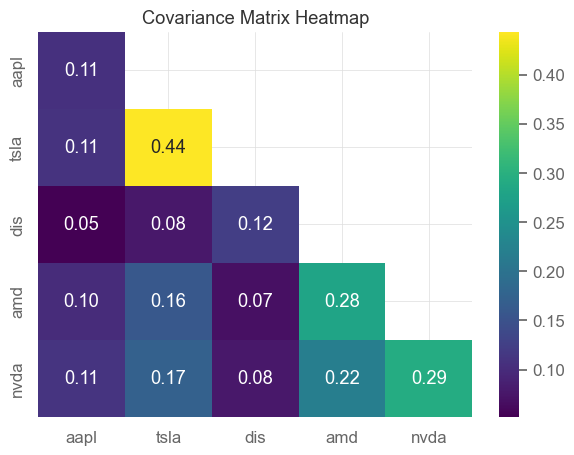

Optimized weights of the assets:


OrderedDict([('aapl', 0.0),
             ('tsla', 0.0),
             ('dis', 0.0),
             ('amd', 0.0),
             ('nvda', 1.0)])

In [26]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(opt_df)
S = risk_models.sample_cov(opt_df)

# Display the expected returns
print("Expected Returns (mu):")
print(mu)

# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(7, 5))
mask = np.triu(np.ones_like(S, dtype=bool), k=1)
sns.heatmap(S, annot=True, cmap='viridis', fmt='.2f',mask=mask)
plt.title("Covariance Matrix Heatmap")
plt.show()

# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

clean_weights = ef.clean_weights()

# Printing optimized weights and expected performance for portfolio
print("Optimized weights of the assets:")
clean_weights

In [27]:
# Get the performance of the optimized portfolio
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 96.6%
Annual volatility: 54.1%
Sharpe Ratio: 1.75


Based on historical data, NVIDIA emerges as the asset with the highest expected return, followed by Tesla, albeit with a significant gap. Notably, Disney has underperformed over the past three years, resulting in a negative expected return.

All the assets considered in the portfolio exhibit positive covariance with each other. Tesla is observed to have high volatility, whereas the other assets demonstrate moderate volatility, with Apple having the lowest volatility.

The resulting optimized weights from the MVO model allocate the maximum proportion to NVIDIA stock. Despite Tesla's strong performance during the analyzed period, its high volatility affects its optimized weight in the portfolio.

Evaluating the performance of the efficient frontier, the portfolio with the optimized weights achieves an expected return of 96.6%, annual volatility of 54.1%, and a Sharpe ratio of 1.75.

The Sharpe Ratio measures the risk-adjusted return of the portfolio. It indicates how well the return compensates for the risk taken. A Sharpe ratio of 1.75 suggests that the portfolio provides a favorable return for the level of risk it carries.

However, the high volatility suggests that the portfolio may experience significant fluctuations in value. To mitigate this risk, further diversification by considering additional assets could enhance the portfolio's stability and overall performance.